<a href="https://colab.research.google.com/github/ardiwirya/geografis-bali/blob/main/Rezki_Rahmayani_210170055_SIG_A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <div class ="alert alert-block alert-info"><font size=5.5><r><b><center><span style="color:light">ANALISIS STATISTIK DAN VISUALISASI GEOGRAFIS UNTUK PROVINSI BALI </span></center></i></b></font>
Nama: Rezki Rahmayani<br>
NIM: 210170055<br>
Mata Kuliah: Sistem Informasi Geografis (A5)<br>

In [ ]:
# PENTING: JALANKAN SEL INI UNTUK IMPOR SUMBER DATA KAGGLE ANDA
# KE LOKASI YANG BENAR (/kaggle/input) DI NOTEBOOK ANDA,
# LALU ANDA BEBAS UNTUK MENGHAPUS SEL INI.
# CATATAN: LINGKUNGAN BUKU CATATAN INI BERBEDA DARI PYTHON KAGGLE
# LINGKUNGAN SEHINGGA MUNGKIN HILANG PERPUSTAKAAN YANG DIGUNAKAN BUKU CATATAN ANDA.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'indonesiaprovincejmlpenduduk:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F449598%2F849905%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240630%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240630T153607Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D12618efd852b0cf8e28095bef4158c8bfc080ceea447def7107cd5421eee54e80dc93e60d020939ed96c6931ddf336ee254ed9147770c1d52d723752707cd5aaf7a9b85c3b13e85cc86e22a9728a37331a78a4cdcae18b9951b369640a2c101d54615901abb8d807b38b3b7a60c4424e9e0d683d55a236fcd29ab3bb2cef4f0ccd642863eb2f869833502f20b63bfdbd447c32dd857413266c38c9b5b967ba19f98575600b36e28e1c9c4a30a70cbea21f6f4fa66683f0358df301d8e0a9c5c14c07eb4bb1a87f40c2e58cd8822ed4e6e0191133b1ed823e44fd0ae5e716290d0f9a019f3cdb1a3b2984638c007b64ba85603a2be0d7f84e1dae54122ae063b3,bali-popular-destination-for-tourist-2022:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2660060%2F4557489%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240630%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240630T153607Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5b343e382ccb4b3eeb51247673d1f995854f7dcd1891c8c5396f13d573dec6d7c40df4540c0146c34c6095abf6adf9b48a57b2441ff7b2d86f18f3fa9fb96e5b55e53f657852e38832b020b08ebc64d6c872233cf2699aa76d5e087506b8909aa00f3c066a2ee7af48694a856aba990915d273512f89bba1096efa00de01f8f00556160180ecbb470bceb546fa1b88873fc87e6b2ef74be6899cfb78c6ae7a8f000b2443182b1abdf9a3d3062eb8cf39a2e16fd4f4a62d4fd8d7ec69d21f68d5eeea008f6b2e5534a421aa4b30be009cc4f1f037a0e9e79c10b163974d635bfd2be01378b0cdbd3ba811b88f88f34037923d264cf68ca99e46f76da6624a600b'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 4569346 bytes downloaded
Downloaded and uncompressed: indonesiaprovincejmlpenduduk
[==================================================] 8400 bytes downloaded
Downloaded and uncompressed: bali-popular-destination-for-tourist-2022
Data source import complete.


# <div class ="alert alert-block alert-info"><font size=5.5><r><b><center><span style="color:light">Analisis Statistik dan Visualisasi Geopandas</span></center></i></b></font><br>


In [ ]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
warnings.filterwarnings('ignore')

import json
import geopandas as gpd
%matplotlib inline

filename = '/kaggle/input/indonesiaprovincejmlpenduduk/indonesia-province-jml-penduduk.json' # Data jumlah penduduk irian jaya timur dan irian jaya tengah diambil dari provinsi papua dibagi dua
dl = gpd.read_file(filename)
print(type(dl))
dl.head() # lihat seluruh datanya

<class 'geopandas.geodataframe.GeoDataFrame'>


,ID,kode,Propinsi,SUMBER,Jumlah Penduduk,geometry
0,1,85,IRIAN JAYA TIMUR,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,1416690,"MULTIPOLYGON (((137.91666 -1.49852, 137.89260 ..."
1,2,52,NUSATENGGARA BARAT,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,4500212,"MULTIPOLYGON (((117.62720 -8.50640, 117.62630 ..."
2,3,75,GORONTALO,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,1040164,"MULTIPOLYGON (((122.18814 1.04530, 122.18883 1..."
3,4,74,SULAWESI TENGGARA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,2232586,"MULTIPOLYGON (((120.98423 -2.83534, 120.98502 ..."
4,5,34,DAERAH ISTIMEWA YOGYAKARTA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,3457491,"POLYGON ((110.01183 -7.88690, 110.01330 -7.885..."


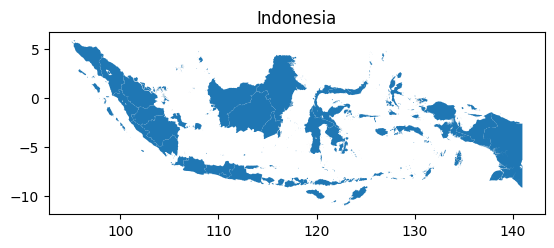

In [ ]:
dl.plot()
plt.title("Indonesia")
plt.show()

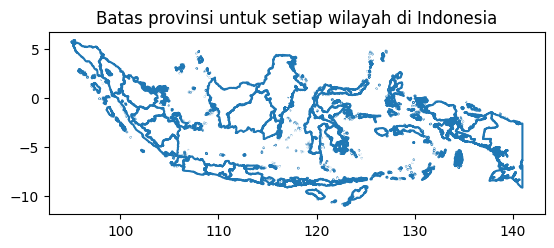

In [ ]:
dl.boundary.plot()
plt.title("Batas provinsi untuk setiap wilayah di Indonesia")
plt.show()

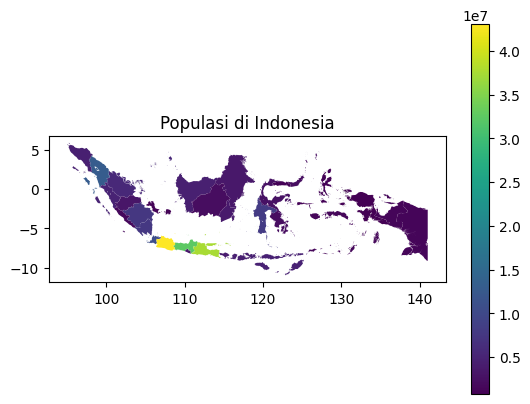

In [ ]:
fig, ax = plt.subplots(1, 1)
gm = dl[dl['Jumlah Penduduk'].notnull()] # pilih baris yang Jumlah Penduduknya bukan nol, untuk berjaga-jaga
dl.plot(column='Jumlah Penduduk', ax=ax, legend=True)
plt.title("Populasi di Indonesia")
plt.show()

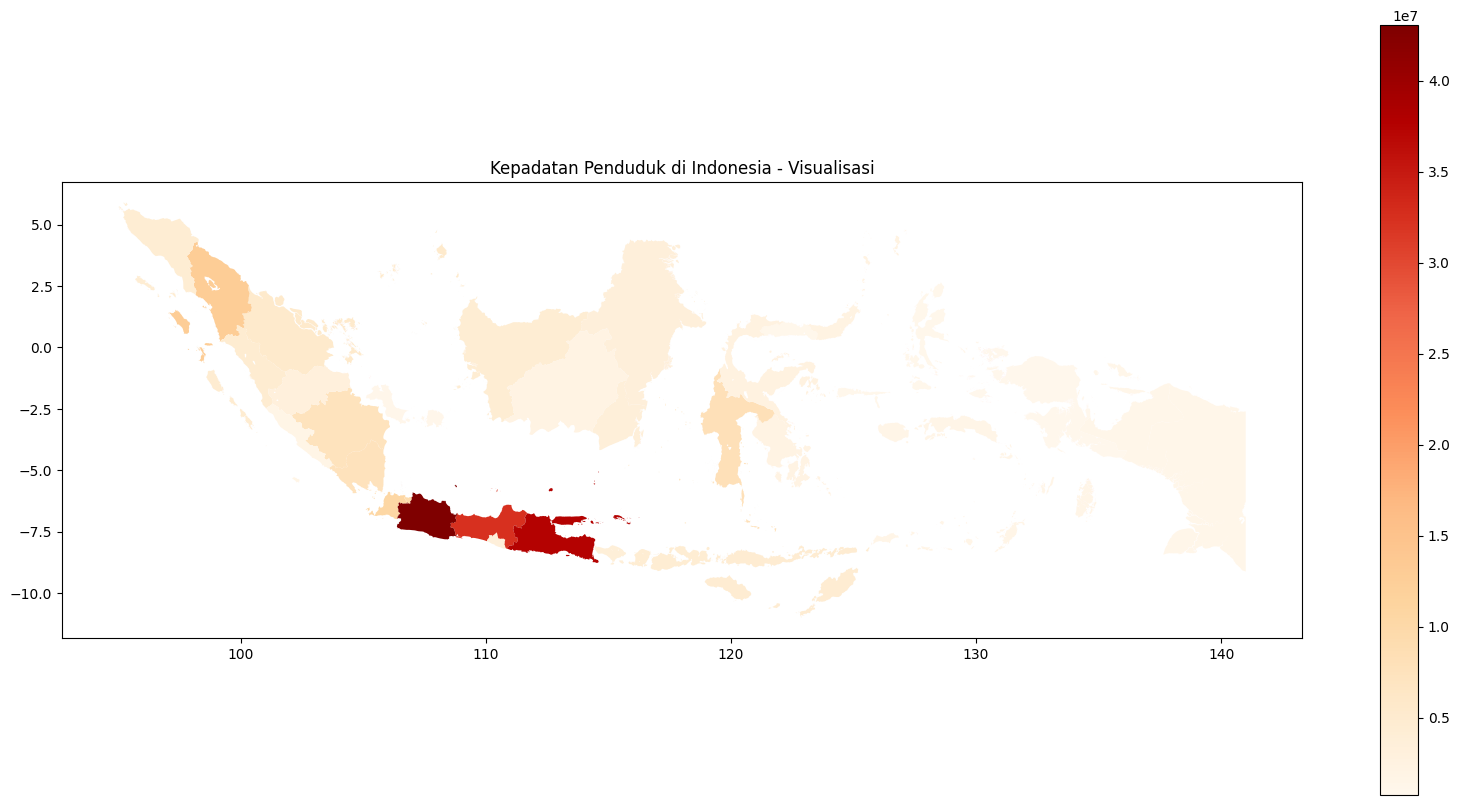

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
dl.plot(column='Jumlah Penduduk', ax=ax, legend=True, cmap='OrRd')
plt.title("Kepadatan Penduduk di Indonesia - Visualisasi")
plt.show()

In [ ]:
pop = dl.loc[:,['Jumlah Penduduk']]
pop_numeric = pop.transform(pd.to_numeric, errors='coerce')
pop_numeric.describe()

,Jumlah Penduduk
count,3.200000e+01
mean,7.337610e+06
std,1.042569e+07
min,7.604220e+05
25%,2.087946e+06
50%,3.758686e+06
75%,7.489897e+06
max,4.305373e+07


In [ ]:
pop_numeric.max()

Jumlah Penduduk    43053732
dtype: int64

In [ ]:
dl[dl['Jumlah Penduduk'] ==  43053732]

,ID,kode,Propinsi,SUMBER,Jumlah Penduduk,geometry
14,15,32,JAWA BARAT,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,43053732,"MULTIPOLYGON (((106.39610 -6.97980, 106.39306 ..."


In [ ]:
pop_numeric.min()

Jumlah Penduduk    760422
dtype: int64

In [ ]:
dl[dl['Jumlah Penduduk'] ==  760422]

,ID,kode,Propinsi,SUMBER,Jumlah Penduduk,geometry
22,23,83,IRIAN JAYA BARAT,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,760422,"MULTIPOLYGON (((134.65901 -2.82598, 134.59894 ..."


## Kesimpulan:

- **Jawa Barat merupakan wilayah terpadat di Indonesia**
- **Irian Jaya Barat adalah wilayah yang paling sedikit penduduknya di Indonesia**

# BALI

In [ ]:
dl.set_index('Propinsi', inplace=True)
dl.head()

,ID,kode,SUMBER,Jumlah Penduduk,geometry
Propinsi,,,,,
IRIAN JAYA TIMUR,1,85,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,1416690,"MULTIPOLYGON (((137.91666 -1.49852, 137.89260 ..."
NUSATENGGARA BARAT,2,52,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,4500212,"MULTIPOLYGON (((117.62720 -8.50640, 117.62630 ..."
GORONTALO,3,75,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,1040164,"MULTIPOLYGON (((122.18814 1.04530, 122.18883 1..."
SULAWESI TENGGARA,4,74,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,2232586,"MULTIPOLYGON (((120.98423 -2.83534, 120.98502 ..."
DAERAH ISTIMEWA YOGYAKARTA,5,34,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,3457491,"POLYGON ((110.01183 -7.88690, 110.01330 -7.885..."


In [ ]:
dl.loc['BALI']

ID                                                                18
kode                                                              51
SUMBER                     Peta Dasar BAKOSURTANAL Skala 1 : 250.000
Jumlah Penduduk                                              3890757
geometry           MULTIPOLYGON (((115.194942 -8.732323, 115.1947...
Name: BALI, dtype: object

> **Jumlah penduduk di Bali 3.890.757**

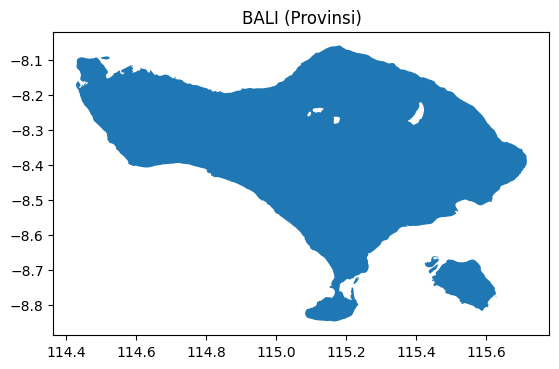

In [ ]:
series = gpd.GeoSeries(dl.loc['BALI']['geometry']) # dapatkan geometri JAWA TIMUR dan ubah menjadi GeoSeries
type(series)

BALI = series.plot() # Plot untuk BALI
BALI
plt.title("BALI (Provinsi)")
plt.show()

In [ ]:
data = pd.read_csv("/kaggle/input/bali-popular-destination-for-tourist-2022/Bali Popular Destination for Tourist 2022 - Sheet1.csv")
data.head()

,Place,Location,Coordinate,Google Maps Rating,Google Reviews (Count),Source,Description,Tourism/Visitor Fee (approx in USD)
0,Tanah Lot,"Beraban, Kec. Kediri, Kabupaten Tabanan, Bali ...","8.6212° S, 115.0868° E",4.6,75899,https://www.google.com/maps/place/Tanah+Lot/@-...,is a rock formation off the Indonesian island ...,"Yes, entrance tickets cost 20,000 Rupiah for I..."
1,Mount Batur,"Bangli Regency, Bali, Indonesia",8°14′20″S 115°22′39″E,4.5,2580,https://www.google.com/maps/place/Mt+Batur/@-8...,Mount Batur (Gunung Batur) is an active volcan...,"Yes, The Mount Batur trekking price is around ..."
2,Uluwatu Temple,"Uluwatu (South Kuta, Badung)","8.8291° S, 115.0849° E",4.6,28800,https://www.google.com/maps/place/Uluwatu+Temp...,The temple is regarded as one of the sad kahya...,"Yes, The Uluwatu Temple Bali entrance fee is I..."
3,Ubud Monkey Forest,"Jl. Monkey Forest, Ubud, Kecamatan Ubud, Kabup...","8.5194° S, 115.2606° E",4.5,36099,https://www.google.com/maps/place/Sacred+Monke...,"Mandala Suci Wenara Wana, or well known as Ubu...","Yes, Visit to the Ubud Monkey Forest are subje..."
4,Goa Gajah,"Gianyar Regency, Bali","8.5069° S, 115.2625° E",4.2,6683,https://www.google.com/maps/place/Goa+Gajah/@-...,"Goa Gajah, or Elephant Cave, is located on the...","Yes, Adult 50.000 IDR ($3.4 USD), Child 25.000..."


In [ ]:
data.columns

Index(['Place', 'Location', 'Coordinate', 'Google Maps Rating',
       'Google Reviews (Count)', 'Source', 'Description',
       'Tourism/Visitor Fee (approx in USD)'],
      dtype='object')

In [ ]:
data.nlargest(34,'Google Maps Rating', keep='all')

,Place,Location,Coordinate,Google Maps Rating,Google Reviews (Count),Source,Description,Tourism/Visitor Fee (approx in USD)
29,Penglipuran Village,"Jl. Penglipuran, Kubu, Kec. Bangli, Kabupaten ...","8°25′19″S, 115°21′32″E",4.8,13207,https://www.google.com/maps/place/Penglipuran+...,Traditional Balinese village selling handicraf...,"Yes, starting from 50.000 IDR ($ 3.48 USD)."
22,Waterboom Bali,"Jl. Kartika Plaza, Tuban, Kec. Kuta, Kabupaten...","8.7286° S, 115.1694° E",4.7,10650,https://www.google.com/maps/place/Waterbom+Bal...,"Lively water park with a rides for all ages, p...","Yes, However, single days pass costs around ID..."
32,Goa Lawah Temple,"CFX9+9GG, Jl. Raya Goa Lawah, Pesinggahan, Kec...","8.5516° S, 115.4688° E",4.7,4479,https://www.google.com/maps/place/Goa+Lawah+Te...,"This small, 11th-century Balinese Hindu temple...","Yes, starting from IDR 20.000 ($ 1.40 USD)."
5,Jatiluwih Rice Terraces in Bali,"Village, Jl. Jatiluwih Kawan No.Desa, Jatiluwi...","8°22'07.1""S 115°07'49.7""E",4.7,7798,https://www.google.com/maps/place/Jatiluwih+Ri...,Jatiluwih rice terraces cover more than 600 he...,"Yes, The entrance fee for Jatiluwih Rice Terra..."
7,Pura Ulun Danu Bratan,"Danau Beratan, Candikuning, Kec. Baturiti, Kab...","8° 16′ 31″ S, 115° 9′ 59″ E",4.7,29178,https://www.google.com/maps/place/Ulun+Danu+Be...,"Pura Ulun Danu Beratan, or Pura Bratan, is a m...","Yes, Adult 50.000 IDR ($3.4 USD), Child 25.000..."
28,Secret Garden Village,"Jl. Raya Denpasar Bedugul km. 36, Mekarsari, B...","8.3727° S, 115.1933° E",4.6,4432,https://www.google.com/maps/place/Secret+Garde...,Beatiful Garden Located in Jalan Raya Denpasar...,"Yes, starting from 45.000 ($ 2.87 USD)."
27,Taman Ujung,"Ujung Water Palace, Tumbu, Kec. Karangasem, Ka...","8.4631° S, 115.6307° E",4.6,3984,https://www.google.com/maps/place/Taman+Ujung/...,"This scenic, former water palace built in 1909...","Yes, 50.000 - 75.000 IDR ($ 3.19 - 4.78 USD)"
19,Tirta Gangga,"Jalan Raya Abang Desa Adat, Ababi, Kec. Abang,...","8.4123° S, 115.5873° E",4.6,12992,https://www.google.com/maps/place/Tirta+Gangga...,Elegant spiritual retreat & gardens surrounded...,"Yes, Tirtagangga palace entrance fee is Rp50.0..."
18,Bali Bird Park,"Jl. Serma Cok Ngurah Gambir Singapadu, Batubul...",8°36′0″S 115°15′4″E,4.6,9847,https://www.google.com/maps/place/Bali+Bird+Pa...,"Animal park with exotic-bird shows, feedings &...","Yes, The basic Bali Bird Park ticket costs IDR..."
14,Tirta Empul Temple,"Jl. Tirta, Manukaya, Kec. Tampaksiring, Kabupa...","8° 24′ 52.8″ S, 115° 18′ 57.6″ E",4.6,16456,https://www.google.com/maps/place/Pura+Tirta+E...,Tirta Empul temple (Indonesian: Pura Tirta Emp...,"Yes, visit to the Tirta Empul Temple are subje..."


> **Desa Penglipuran mendapat rating tertinggi 4.8 dengan 13.207 ulasan**

In [ ]:
data.nlargest(34,'Google Reviews (Count)', keep='all')

,Place,Location,Coordinate,Google Maps Rating,Google Reviews (Count),Source,Description,Tourism/Visitor Fee (approx in USD)
0,Tanah Lot,"Beraban, Kec. Kediri, Kabupaten Tabanan, Bali ...","8.6212° S, 115.0868° E",4.6,75899,https://www.google.com/maps/place/Tanah+Lot/@-...,is a rock formation off the Indonesian island ...,"Yes, entrance tickets cost 20,000 Rupiah for I..."
16,Garuda Wisnu Kencana Cultural Park,"Uluwatu St, Ungasan, South Kuta, Badung Regenc...","8.8104° S, 115.1676° E",4.5,50703,https://www.google.com/maps/place/Garuda+Wisnu...,Garuda Wisnu Kencana Cultural Park (Indonesian...,"Yes, Garuda Wisnu Kencana Cultural Park Entran..."
11,Kuta Beach,"Kuta District, Badung Regency, southern Bali","8.7185° S, 115.1686° E",4.5,37663,https://www.google.com/maps/place/Kuta+Beach/@...,"Kuta is a tourist area, administratively an ur...","Kuta Beach is accessible 24 hours, 7 days a we..."
3,Ubud Monkey Forest,"Jl. Monkey Forest, Ubud, Kecamatan Ubud, Kabup...","8.5194° S, 115.2606° E",4.5,36099,https://www.google.com/maps/place/Sacred+Monke...,"Mandala Suci Wenara Wana, or well known as Ubu...","Yes, Visit to the Ubud Monkey Forest are subje..."
6,Tenggalang Rice Terrace,"Jl. Raya Tegallalang, Tegallalang, Kec. Tegall...","8.4028° S, 115.2880° E",4.4,33732,https://www.google.com/maps/place/Tegallalang+...,Tegallalang is a district in the Gianyar Regen...,"Yes, 15.000 IDR ($1) per person, and 5000 ($ 0..."
7,Pura Ulun Danu Bratan,"Danau Beratan, Candikuning, Kec. Baturiti, Kab...","8° 16′ 31″ S, 115° 9′ 59″ E",4.7,29178,https://www.google.com/maps/place/Ulun+Danu+Be...,"Pura Ulun Danu Beratan, or Pura Bratan, is a m...","Yes, Adult 50.000 IDR ($3.4 USD), Child 25.000..."
2,Uluwatu Temple,"Uluwatu (South Kuta, Badung)","8.8291° S, 115.0849° E",4.6,28800,https://www.google.com/maps/place/Uluwatu+Temp...,The temple is regarded as one of the sad kahya...,"Yes, The Uluwatu Temple Bali entrance fee is I..."
20,Tegenungan Waterfall,"Jl. Ir. Sutami, Kemenuh, Kec. Sukawati, Kabupa...","8.5754° S, 115.2888° E",4.3,23349,https://www.google.com/maps/place/Tegenungan+W...,Scenic waterfall in a lush jungle setting abov...,"Yes, visit to the Tegenungan Waterfall are sub..."
14,Tirta Empul Temple,"Jl. Tirta, Manukaya, Kec. Tampaksiring, Kabupa...","8° 24′ 52.8″ S, 115° 18′ 57.6″ E",4.6,16456,https://www.google.com/maps/place/Pura+Tirta+E...,Tirta Empul temple (Indonesian: Pura Tirta Emp...,"Yes, visit to the Tirta Empul Temple are subje..."
24,Bali Safari and Marine Park,"Jl. Prof. Dr. Ida Bagus Mantra No.km 19, Seron...","8° 35' 27.024"" S, 115° 20' 31.344"" E",4.4,16042,https://www.google.com/maps/place/Bali+Safari+...,Family-friendly locale offering safaris for an...,"Yes, the basic Bali Safari and Marine Park ent..."


> **Tanah Lot mendapatkan jumlah ulasan tertinggi 75.899 dengan rating 4.6**

# Terima kasih atas perhatian dan kerjasamanya.

Apabila ada kekurangan, mohon dimaafkan dan saya sangat menghargai saran serta masukan yang diberikan. Semoga kita bisa terus belajar dan berkembang bersama.
